# YouTube Spam Collection v. 1

## Grupo 2
Alberto Atilio Sbrana Junior
<br>
Luiz Barreto Pedro de Alcântara
<br>
Priscila Portela Costa

# Problema

Trata-se de um problema de classificação binária sobre comentários de vídeos no Youtube.
<br>
Há no total 5 arquivos, separados por artista:
- Psy
- Katy Perry
- LMFAO
- Eminem
- Shakira

# Bibliotecas

In [7]:
import pandas as pd #manipulação de dataframes
import numpy as np #manipulacao matricial
import seaborn as sns #visualização
import matplotlib.pyplot as plt #visualização

# importa algumas biblioteca para plotar dados em 3D        
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from pylab import *

import scipy.optimize  #otimizacao de parametros

from ML_library import * #biblioteca criada pelo grupo 2

# Modelo 1: K-Nearest Neighbors (K-NN)

Para este tipo de algoritmo, devemos identificar qual o melhor número de K (vizinhos).

## Carregando os _datasets_

In [8]:
#occurency
X_occur_train = pd.read_csv('X_occurrency_train.csv', header=None)
X_occur_test = pd.read_csv('X_occurrency_test.csv', header=None)
X_occur_val = pd.read_csv('X_occurrency_validation.csv', header=None)

Y_occur_train = pd.read_csv('Y_occurrency_train.csv', header=None)
Y_occur_test = pd.read_csv('Y_occurrency_test.csv', header=None)
Y_occur_val = pd.read_csv('Y_occurrency_validation.csv', header=None)

#frequency
X_frequ_train = pd.read_csv('X_frequency_train.csv', header=None)
X_frequ_test = pd.read_csv('X_frequency_test.csv', header=None)
X_frequ_val = pd.read_csv('X_frequency_validation.csv', header=None)

Y_frequ_train = pd.read_csv('Y_frequency_train.csv', header=None)
Y_frequ_test = pd.read_csv('Y_frequency_test.csv', header=None)
Y_frequ_val = pd.read_csv('Y_frequency_validation.csv', header=None)

#tf_idf
X_tfidf_train = pd.read_csv('X_tfidf_train.csv', header=None)
X_tfidf_test = pd.read_csv('X_tfidf_test.csv', header=None)
X_tfidf_val = pd.read_csv('X_tfidf_validation.csv', header=None)

Y_tfidf_train = pd.read_csv('Y_tfidf_train.csv', header=None)
Y_tfidf_test = pd.read_csv('Y_tfidf_test.csv', header=None)
Y_tfidf_val = pd.read_csv('Y_tfidf_validation.csv', header=None)

## Funções Auxiliares

In [9]:
def prep_Y(y):
    return np.array(y.values.flatten(), dtype = int)

#Normalização min-max
def min_max_scaler(x, scaler = None):
    if scaler == None:
        x_scaler = [x.min(), x.max()]
        x_scaled = (x - x.min()) / (x.max() - x.min())
        x_scaled.fillna(0, inplace = True)
        return x_scaler, x_scaled
    else:
        x_scaled = (x - scaler[0]) / (scaler[1] - scaler[0]).replace(0, np.inf)
        x_scaled = x_scaled.replace([np.inf, -np.inf], np.nan).fillna(0)
        return x_scaled

### Lista de K vizinhos avaliados

In [10]:
K = list(range(20,400,60))

In [11]:
K

[20, 80, 140, 200, 260, 320, 380]

## Occurrency

In [13]:
Y_occur_train, Y_occur_val = prep_Y(Y_occur_train), prep_Y(Y_occur_val)    

X_occur_scaler, X_train_occur_scaled = min_max_scaler(X_occur_train)
X_val_occur_scaled = min_max_scaler(X_occur_val, X_occur_scaler)
X_train_occur_scaled, X_val_occur_scaled = X_train_occur_scaled.values, X_val_occur_scaled.values

In [14]:
k_cm_occur = {}

for i_K in K:
    print('Número de vizinhos: {}'.format(i_K))
    y_pred = []
    for sample in X_val_occur_scaled:
        y_pred_sample = knn(sample, X_train_occur_scaled, Y_occur_train, i_K)
        y_pred.append(y_pred_sample)
        
    cm = get_confusionMatrix(Y_occur_val, y_pred, [0,1])
    k_cm_occur[i_K] = cm    
    print(cm)
    print('---')

Número de vizinhos: 20
[[140   9]
 [ 39  79]]
---
Número de vizinhos: 80
[[138  11]
 [ 54  64]]
---
Número de vizinhos: 140
[[138  11]
 [ 59  59]]
---
Número de vizinhos: 200
[[142   7]
 [ 73  45]]
---
Número de vizinhos: 260
[[147   2]
 [103  15]]
---
Número de vizinhos: 320
[[148   1]
 [109   9]]
---
Número de vizinhos: 380
[[149   0]
 [113   5]]
---


## Frequency

In [15]:
Y_frequ_train, Y_frequ_val = prep_Y(Y_frequ_train), prep_Y(Y_frequ_val)    

X_frequ_scaler, X_train_frequ_scaled = min_max_scaler(X_frequ_train)
X_val_frequ_scaled = min_max_scaler(X_frequ_val, X_frequ_scaler)
X_train_frequ_scaled, X_val_frequ_scaled = X_train_frequ_scaled.values, X_val_frequ_scaled.values

In [16]:
k_cm_frequ = {}

for i_K in K:
    print('Número de vizinhos: {}'.format(i_K))
    y_pred = []
    for sample in X_val_frequ_scaled:
        y_pred_sample = knn(sample, X_train_frequ_scaled, Y_frequ_train, i_K)
        y_pred.append(y_pred_sample)
        
    cm = get_confusionMatrix(Y_frequ_val, y_pred, [0,1])
    k_cm_frequ[i_K] = cm    
    print(cm)
    print('---')

Número de vizinhos: 20
[[98 51]
 [25 93]]
---
Número de vizinhos: 80
[[107  42]
 [ 39  79]]
---
Número de vizinhos: 140
[[107  42]
 [ 49  69]]
---
Número de vizinhos: 200
[[107  42]
 [ 52  66]]
---
Número de vizinhos: 260
[[140   9]
 [ 67  51]]
---
Número de vizinhos: 320
[[148   1]
 [ 83  35]]
---
Número de vizinhos: 380
[[148   1]
 [ 90  28]]
---


## TF-IDF

In [17]:
Y_tfidf_train, Y_tfidf_val = prep_Y(Y_tfidf_train), prep_Y(Y_tfidf_val)    

X_tfidf_scaler, X_train_tfidf_scaled = min_max_scaler(X_tfidf_train)
X_val_tfidf_scaled = min_max_scaler(X_tfidf_val, X_tfidf_scaler)
X_train_tfidf_scaled, X_val_tfidf_scaled = X_train_tfidf_scaled.values, X_val_tfidf_scaled.values

In [18]:
k_cm_tfidf = {}

for i_K in K:
    print('Número de vizinhos: {}'.format(i_K))
    y_pred = []
    for sample in X_val_tfidf_scaled:
        y_pred_sample = knn(sample, X_train_tfidf_scaled, Y_tfidf_train, i_K)
        y_pred.append(y_pred_sample)
        
    cm = get_confusionMatrix(Y_tfidf_val, y_pred, [0,1])
    k_cm_tfidf[i_K] = cm    
    print(cm)
    print('---')

Número de vizinhos: 20
[[138  11]
 [ 53  65]]
---
Número de vizinhos: 80
[[130  19]
 [ 59  59]]
---
Número de vizinhos: 140
[[123  26]
 [ 59  59]]
---
Número de vizinhos: 200
[[118  31]
 [ 60  58]]
---
Número de vizinhos: 260
[[147   2]
 [ 87  31]]
---
Número de vizinhos: 320
[[149   0]
 [ 98  20]]
---
Número de vizinhos: 380
[[148   1]
 [107  11]]
---


## Análise das matrizes de confusão obtidas

In [19]:
print('Preprocessamento: Occurrency')
for k, cm in k_cm_occur.items():
    vp=cm[0,0] # quantidade de verdadeiros positivos
    vn=cm[1,1] # quantidade de verdadeiros negativos
    fp=cm[1,0] # quantidade de falsos positivos
    fn=cm[0,1] # quantidade de falsos negativos
    
    recall = vp/(vp+fn)
    precision = vp/(vp+fp)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    print('{} vizinhos: {}'.format(k, f1))

Preprocessamento: Occurrency
20 vizinhos: 0.8536585365853658
80 vizinhos: 0.809384164222874
140 vizinhos: 0.7976878612716763
200 vizinhos: 0.7802197802197802
260 vizinhos: 0.736842105263158
320 vizinhos: 0.7290640394088669
380 vizinhos: 0.7250608272506083


In [20]:
print('Preprocessamento: Frequency')
for k, cm in k_cm_frequ.items():
    vp=cm[0,0] # quantidade de verdadeiros positivos
    vn=cm[1,1] # quantidade de verdadeiros negativos
    fp=cm[1,0] # quantidade de falsos positivos
    fn=cm[0,1] # quantidade de falsos negativos
    
    recall = vp/(vp+fn)
    precision = vp/(vp+fp)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    print('{} vizinhos: {}'.format(k, f1))

Preprocessamento: Frequency
20 vizinhos: 0.7205882352941176
80 vizinhos: 0.7254237288135593
140 vizinhos: 0.7016393442622951
200 vizinhos: 0.6948051948051949
260 vizinhos: 0.7865168539325843
320 vizinhos: 0.7789473684210526
380 vizinhos: 0.764857881136951


In [21]:
print('Preprocessamento: TF-IDF')
for k, cm in k_cm_tfidf.items():
    vp=cm[0,0] # quantidade de verdadeiros positivos
    vn=cm[1,1] # quantidade de verdadeiros negativos
    fp=cm[1,0] # quantidade de falsos positivos
    fn=cm[0,1] # quantidade de falsos negativos
    
    recall = vp/(vp+fn)
    precision = vp/(vp+fp)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    print('{} vizinhos: {}'.format(k, f1))

Preprocessamento: TF-IDF
20 vizinhos: 0.8117647058823528
80 vizinhos: 0.7692307692307692
140 vizinhos: 0.743202416918429
200 vizinhos: 0.7217125382262997
260 vizinhos: 0.7676240208877284
320 vizinhos: 0.7525252525252526
380 vizinhos: 0.7326732673267328


Analisando os resultados, vamos escolher o tratamento e a matriz de confusão que apresenta a melhor pontuação na forma de medição escolhida.
Com isso, temos que o tratamento _occurrency_, com o número de vizinhos igual a _20_, é a melhor escolha.
<br>
<br>
Para essa combinação, vamos plotar a curva de aprendizado.

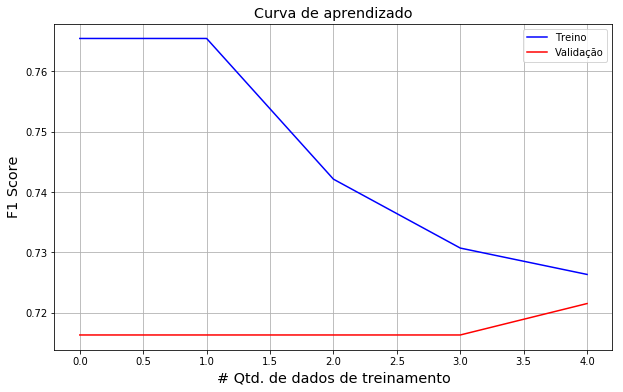

In [22]:
def curva_aprendizado_knn(X, Y, Xval, Yval, K):

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []
    
    num_rows = len(X)
    
    for i in range(100,num_rows, 200):
        x_train = X[0:i,:]
        y_train = Y[0:i]
        
        #train
        pred_train = []
        for sample in x_train:
            y_pred_sample = knn(sample, x_train, y_train, K)
            pred_train.append(y_pred_sample)            
        
        #validation
        pred_val = []
        for sample in Xval:
            y_val_sample = knn(sample, x_train, y_train, K)
            pred_val.append(y_val_sample)          
        
        #scores
        #train
        cm_train = get_confusionMatrix(y_train, pred_train, [0,1])
        vp_train=cm_train[0,0] # quantidade de verdadeiros positivos
        vn_train=cm_train[1,1] # quantidade de verdadeiros negativos
        fp_train=cm_train[1,0] # quantidade de falsos positivos
        fn_train=cm_train[0,1] # quantidade de falsos negativos
        
        recall_train = vp_train/(vp_train+fn_train)
        precision_train = vp_train/(vp_train+fp_train)
    
        f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)               
        #val     
        cm_val = get_confusionMatrix(Yval, pred_val, [0,1])
        vp_val=cm_val[0,0] # quantidade de verdadeiros positivos
        vn_val=cm_val[1,1] # quantidade de verdadeiros negativos
        fp_val=cm_val[1,0] # quantidade de falsos positivos
        fn_val=cm_val[0,1] # quantidade de falsos negativos
        
        recall_val = vp_val/(vp_val+fn_val)
        precision_val = vp_val/(vp_val+fp_val)
    
        f1_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)         
                
        perf_train.append(f1_train)
        perf_val.append(f1_val)
       
    # Define o tamanho da figura 
    plt.figure(figsize=(10,6))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'F1 Score',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado_knn(X_train_occur_scaled, Y_occur_train, X_val_occur_scaled, Y_occur_val, 380)

Povemos verificar que, quanto maior a quantidade de dados no conjunto de treinamento, há um queda no score do conjunto de treino e um aumento no score do conjunto de teste.

Utilizando o parâmetro escolhido de 20 vizinhos no _dataset_ de teste, obtemos o resultado a seguir.

In [23]:
X_test_frequ_scaled = min_max_scaler(X_frequ_test, X_frequ_scaler)
Y_frequ_test = prep_Y(Y_frequ_test)

In [24]:
print('Número de vizinhos: {}'.format(20))
y_pred = []
for sample in X_test_frequ_scaled:
    y_pred_sample = knn(sample, X_train_frequ_scaled, Y_frequ_train, 20)
    y_pred.append(y_pred_sample)
        
cm = get_confusionMatrix(Y_frequ_val, y_pred, [0,1])
print(cm)
print('---')

Número de vizinhos: 20
[[148   1]
 [118   0]]
---


In [25]:
vp=cm[0,0] # quantidade de verdadeiros positivos
vn=cm[1,1] # quantidade de verdadeiros negativos
fp=cm[1,0] # quantidade de falsos positivos
fn=cm[0,1] # quantidade de falsos negativos

recall = vp/(vp+fn)
precision = vp/(vp+fp)
    
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 score para {} vizinhos: {}'.format(20, f1))

F1 score para 20 vizinhos: 0.7132530120481928


Apesar de não ser um bom score, já está acima de um classificador aleatório.